# Q1

In [1]:
import pandas as pd
import numpy as np


In [2]:
#Reading values from DF1 and storing it in df1

df1 = pd.read_csv(r'Lab2_Data/DF1',index_col=0, sep=',')
df1

0         1         2         3
0     1.038502  0.899865  0.835053 -0.971528
1     0.320455 -0.647459  0.149079  0.352593
2     0.055480  2.234771  0.271672 -2.108739
3    -0.007260 -0.524299 -0.126550  0.670827
4    -1.237390 -1.377017 -1.049932  1.342079
...        ...       ...       ...       ...
9995 -0.632309 -0.145873 -0.797517  0.436184
9996  0.679417 -0.530216  0.526470  0.439397
9997  0.890697 -2.210855  1.072751  2.285372
9998  0.475293  0.490971  0.536909 -0.195772
9999  1.207406  0.819239  1.230797 -0.752397

[10000 rows x 4 columns]

In [16]:
import random
colors = list()
palette = {0: "red", 1: "green", 2: "blue", 3: "yellow"}

for c in range(0,10000): colors.append(palette[random.randint(0, 3)])

Plot to display DataSet df1 values


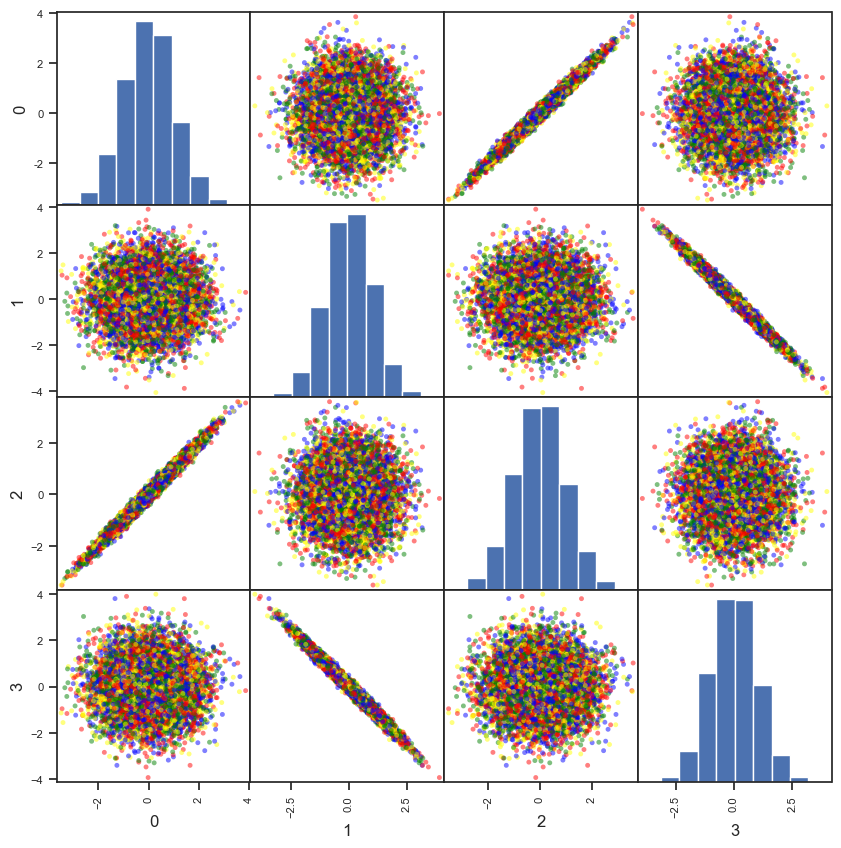

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


print("Plot to display DataSet df1 values")


pd.plotting.scatter_matrix(df1,  figsize = (10,10), color=colors, s=50)
plt.show()

Plot to display correlation with Seaborn


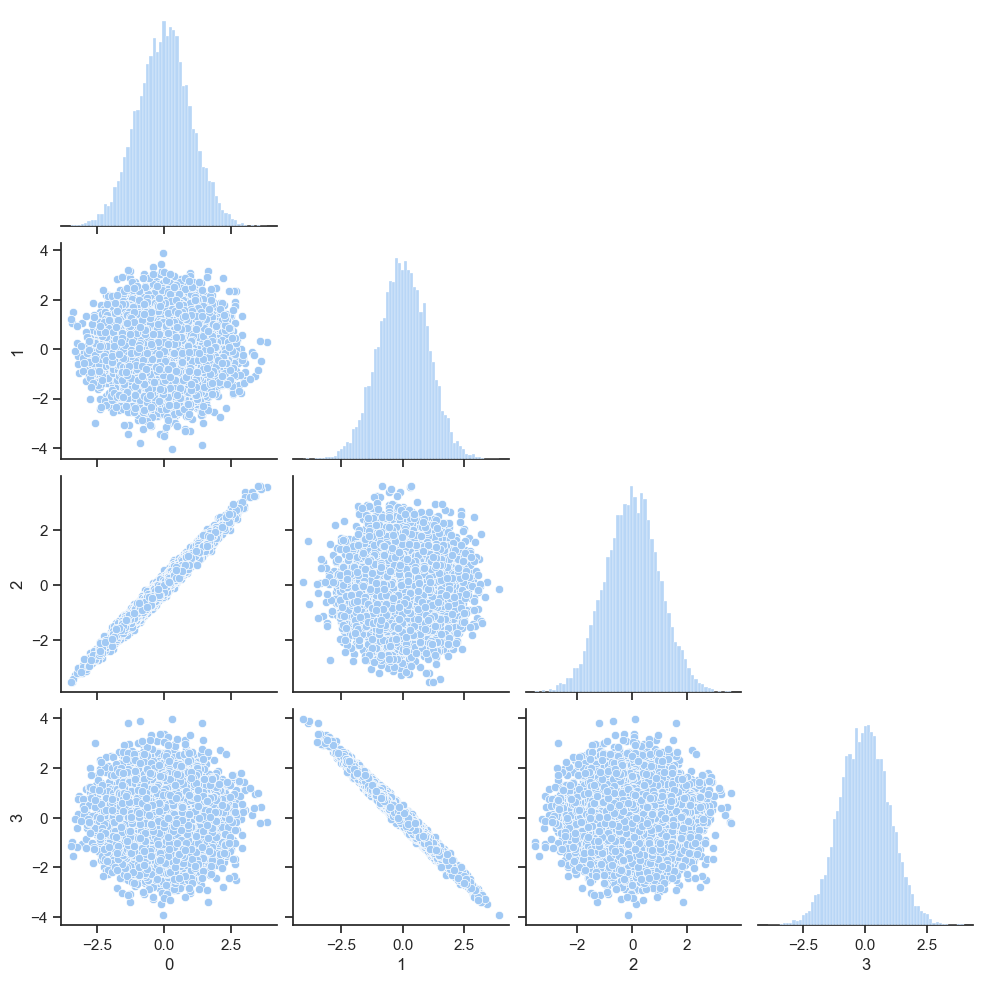

In [37]:
#Using seaborn to plot co-relation
import seaborn as sns

sns.set(style="ticks", color_codes=True)

print("Plot to display correlation with Seaborn")

palette = sns.color_palette("bright")
sns.set_palette("pastel")
sns.pairplot(df1, corner=True)
plt.show()

In [40]:
#Computing Covariance of df1

df_cov = np.cov(df1)

In [39]:
df_covariance = np.cov(df1,rowvar=False)
print('The covariance matrix of df1 is:')
print(df_covariance)

The covariance matrix of df1 is:
[[ 1.00155793 -0.00401176  0.99162409  0.00412485]
 [-0.00401176  1.00537841 -0.00409877 -0.99545662]
 [ 0.99162409 -0.00409877  1.00158867  0.00408108]
 [ 0.00412485 -0.99545662  0.00408108  1.00516828]]


In [43]:
#Choose a symmetric matrix
sym_matrix = [[1.0, 0.0, 0.0],\
              [0.0, 1.0, 0.4], \
              [0.0, 0.4, 1.0]]
print("Sample symmetric matrix")
print(sym_matrix)

Sample symmetric matrix
[[1.0, 0.0, 0.0], [0.0, 1.0, 0.4], [0.0, 0.4, 1.0]]


In [46]:
zero_list = [0, 0, 0]

In [52]:
#Using multivariate_normal to derive the covariance 
covariance_x = range(0, 3000, 2)
covariance_y =[np.cov(np.random.multivariate_normal(zero_list, size=n, cov=sym_matrix),rowvar=False)[1][2] for n in covariance_x]

/var/folders/gp/xs_xkf814zx898m2wdld0hw40000gn/T/ipykernel_96606/1262297808.py:2: RuntimeWarning: Degrees of freedom <= 0 for slice
  covariance_y =[np.cov(np.random.multivariate_normal(zero_list, size=n, cov=sym_matrix),rowvar=False)[1][2] for n in covariance_x]


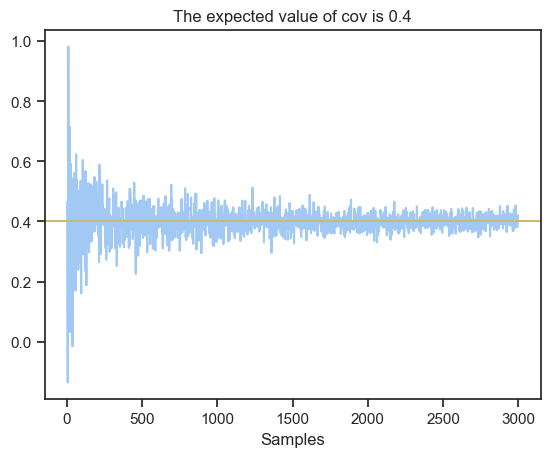

In [53]:
#From the plot it is clear that as the number of the samples we use increases the covariance value is getting close to 0.4
plt.xlabel('Samples')
plt.title('The expected value of cov is 0.4')
plt.plot(x,y)
plt.axhline(0.4, 0, 3000, color='y')
plt.show()

Due to the significant covariance between a variable and itself, the covariances along the diagonal tend to be one. Regarding the other high covariances, we can observe a strong correlation between the variances of the corresponding pairs of variables from the plots.
This results in exceptionally densely clustered points along a negatively or positive axis, depending on the covariance sign. There is typically no correlation between the distribution of the covariances with relatively low values and the random groupings of points in the plots.

# Question 2:

In [59]:
df2 = pd.read_csv(r'Lab2_Data/DF2', index_col=[0], sep=',')
df2

0         1
0     1.038502  0.835053
1     0.320455  0.149079
2     0.055480  0.271672
3    -0.007260 -0.126550
4    -1.237390 -1.049932
...        ...       ...
9995 -0.632309 -0.797517
9996  0.679417  0.526470
9997  0.890697  1.072751
9998  0.475293  0.536909
9999  1.207406  1.230797

[10000 rows x 2 columns]

In [60]:
#To plot the dataframe
first_variable = df2.iloc[:,0]
second_variable = df2.iloc[:,1]

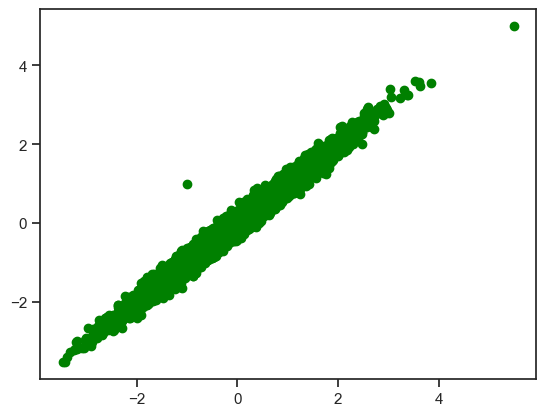

In [61]:
plt.scatter(first_variable,second_variable, color='green')
plt.show()

In [63]:
#calculating the covariance based on the above scatterplot inorder to quantize 
#the variability between the datasets and outliers

df2_cov = np.cov(df2, rowvar=False)


In [65]:
#calculating the eigenvalues and right eigenvectors for the given square matrix 
#(covariance matrix)

i,j = np.linalg.eig(df2_cov)


In [73]:
 #calculating covariance value
 #Extract the diagonal array through the concept of eigen values matrix
var = i**(-1/2)
Q = np.diag(var) @ j.T
new_Data = Q @ df2.T
new_Data = new_Data.T
#Estimating the dot product

In [82]:
#Getting values of outliers
outlier1 = df2.index[(df2['0']==-1) & (df2['1']==1)]
outlier2 = df2.index[(df2['0']==5.5) & (df2['1']==5)]

(-10.0, 15.0)

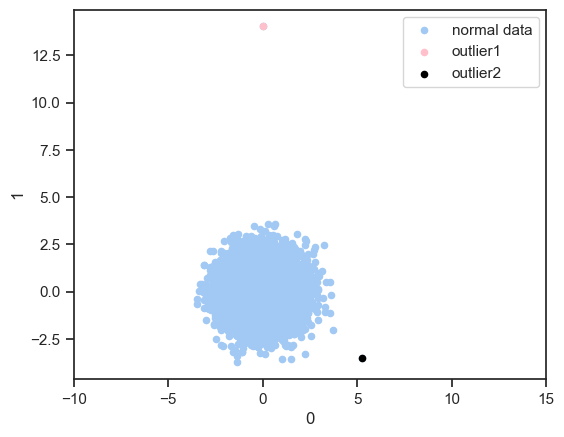

In [83]:
ax_val = new_Data.plot(x=0, y=1, kind="scatter")
new_Data.loc[outlier1].plot(x=0, y=1, kind="scatter", ax=ax_val, c="pink")
new_Data.loc[outlier2].plot(x=0, y=1, kind="scatter", ax=ax_val, c="black")
ax_val.legend(['normal data','outlier1','outlier2'])
ax_val.set_aspect('equal')
ax_val.set_xlim(-10,15)
#now plotting the scatter plot to depict the outlier points
#Using the above eigen values, covariance and dot product to show that (5,5.5) 
#is nearer than (-1,1)


# Question 3

In [84]:
import numpy as np
import pandas as pd
import glob
import os

from scipy.stats import percentileofscore
from collections import defaultdict
from operator import add
from pyspark.mllib.feature import HashingTF, IDF
import math, random

year = input("Enter year:")
k = int(input("Enter k:"))
#year = './Names/yob' + year + '.txt'


#df = pd.read_csv(year, index_col=None, header=0)
#year=2015
chosenYear = pd.read_csv("Names/yob%s.txt" % year ,names = ["Name", "Gender","Number"])

#df.loc[df['Name'] == name]

chosenYear['Name'].value_counts().head(k)

Enter year:2015
Enter k:10


Emma      2
Chase     2
Karson    2
Nino      2
Lyrick    2
Sully     2
Nix       2
Taygen    2
Stone     2
Wyatt     2
Name: Name, dtype: int64

In [85]:
chosenYear.head(5)

Name Gender  Number
0      Emma      F   20355
1    Olivia      F   19553
2    Sophia      F   17327
3       Ava      F   16286
4  Isabella      F   15504

In [86]:
#part 2

path = r'Names/'                     # use your path
all_files = glob.glob(os.path.join(path, "*.txt"))

li = []

for filename in all_files:
    date = filename.replace('Names/yob','').replace('.txt','')

    df = pd.read_csv(filename, index_col=None, header=0,names = ["Name", "Gender","Number"])
    df['year'] = date
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
name = input("Enter name to evaluate for men and women:")
namesumF = df.loc[df['Name'] == name].loc[df['Gender']=='F'].Number.sum()
print("The name ",name," is repated",namesumF, " times for Females")

namesumM = df.loc[df['Name'] == name].loc[df['Gender']=='M'].Number.sum()
print("The name ",name," is repated",namesumM, " times for Males")

Enter name to evaluate for men and women:Sara
The name  Sara  is repated 419025  times for Females
The name  Sara  is repated 1236  times for Males


In [87]:
#Calculate frequency of name but per year
def nameFreqByYear(name):
    
    #getting people with same name and gender in chosen year
    maleCol = chosenYear['Number'].loc[(chosenYear['Name'] == name) & (chosenYear['Gender'] == 'M')]
    femaleCol = chosenYear['Number'].loc[(chosenYear['Name'] == name) & (chosenYear['Gender'] == 'F')]

    if maleCol.empty is False:
        maleCount = maleCol.values[0]
    else:
        maleCount = 0
    
    if femaleCol.empty is False:
        femaleCount = femaleCol.values[0]
    else:
        femaleCount = 0
        
    return maleCount,femaleCount

In [88]:
#method to calculate relative frequency as mapped to total names
def relativeFreq(name):
    maleCount,femaleCount = nameFreqByYear(name)
    
    sumByYear = np.sum(chosenYear,axis=0)[2]
    ansMale = maleCount/sumByYear
    ansFemale = femaleCount/sumByYear
    
    return ansMale,ansFemale



In [89]:
#method for frequency per year    
def freqPerYear(name,flag):
    ret = []
    for year in range(1880, 2016):
        chosenYear['year'] = year
        if not flag:
            maleFrequency, femaleFrequency = nameFreqByYear(name)
            chosenYear.loc[(chosenYear['Name'] == name) & (chosenYear['year'] == year) & (chosenYear['Gender'] == 'M'), 'Frequency'] = maleFrequency
            chosenYear.loc[(chosenYear['Name'] == name) & (chosenYear['year'] == year) & (chosenYear['Gender'] == 'F'), 'Frequency'] = femaleFrequency
        else:
            maleFrequency, femaleFrequency = relativeFreq(name)
            chosenYear.loc[(chosenYear['Name'] == name) & (chosenYear['year'] == year) & (chosenYear['Gender'] == 'M'), 'Frequency'] = maleFrequency
            chosenYear.loc[(chosenYear['Name'] == name) & (chosenYear['year'] == year) & (chosenYear['Gender'] == 'F'), 'Frequency'] = femaleFrequency
            
            
    ret.append(chosenYear.loc[(chosenYear['Name'] == name) & (chosenYear['year'] == year),('year', 'Name', 'Frequency', 'Gender')])
    ret = pd.concat(ret)
    return ret



In [90]:
#answer for part 3
relativeFrequencyForName = freqPerYear('Sara', flag=True)
print("The relative frequency for chosen name that is Sara in chosen year: \n",relativeFrequencyForName)

The relative frequency for chosen name that is Sara in chosen year: 
      year  Name  Frequency Gender
161  2015  Sara   0.000535      F


In [91]:
#Part 4


#method to loop over given year file
def getDataForYear(year):
    ret = pd.read_csv("Names/yob%s.txt" % year ,names = ["Name", "Gender","Number"])
    return ret


#calculates names that were popular for M and then swicthed to F and vice versa
def namesPopularitySwitch():
    ret = []
    
    #loop over every year
    for year in range(1880,2016):
        temp = getDataForYear(year)
        temp['Year'] = year
        ret.append(temp)
        
    
    ret = pd.concat(ret)
    
    #assign change column 
    ret["change"] = ret["Gender"].map({'M':1,'F':-1})
    ret["change"] = ret["change"] * ret["Number"]
    
    #drop year info
    ret = ret.groupby(["Name","Year"]).sum()
    ret = ret.reset_index().drop('Year',1)
    
    #assign extreme values
    ret = ret.groupby('Name').agg({'change':['min','max']})
    ret.columns = ['min', 'max']
    
    
    #create new switch column if there was flag switch in name and remove rest
    ret['switch'] = (np.sign(ret["min"] * ret['max']) == -1)
    ret = ret[ret['switch']].reset_index()
    
    return ret['Name'].values


print(namesPopularitySwitch())



['Aalijah' 'Aamari' 'Aaren' ... 'Zy' 'Zyaire' 'Zyian']


/var/folders/gp/xs_xkf814zx898m2wdld0hw40000gn/T/ipykernel_96606/3199712752.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ret = ret.reset_index().drop('Year',1)
